In [1]:
import pandas as pd
import numpy as np
from deepplot import ROC_threshold, Roc_Auc_Plot, classification_evaluation

<Figure size 432x288 with 0 Axes>

In [2]:
train_df = pd.read_csv('./data2/train_results.csv')
test_df = pd.read_csv('./data2/test_results.csv')
extest_df = pd.read_csv('./data2/extest_results.csv')

In [3]:
len(extest_df)

45

In [4]:
train_y_score = train_df['train_pred']
train_y_true = train_df['train_label']
train_thre = ROC_threshold(train_y_true, train_y_score)[0]
print(train_thre)

0.51685315972792


In [5]:
test_y_score = np.array(test_df['test_pred'])
test_y_true = test_df['test_label']
test_thre = ROC_threshold(test_y_true, test_y_score)
print(test_thre)

(0.690159416476732, [0.25, 0.9130434782608695])


In [6]:
extest_y_score = np.array(extest_df['extest_pred'])
extest_y_true = extest_df['extest_label']
extest_thre = ROC_threshold(extest_y_true, extest_y_score)
print(extest_thre)

(0.452291774883668, [0.47368421052631576, 0.9615384615384616])


In [7]:
extest_y_score = np.array(extest_df['extest_pred'])
extest_y_true = extest_df['extest_label']
extest_thre = ROC_threshold(extest_y_true, extest_y_score)[0]
print(extest_thre)

0.452291774883668


In [8]:
train_y_pred = train_y_score > train_thre
test_y_pred = test_y_score > train_thre
extest_y_pred = extest_y_score > train_thre 
print(test_y_pred)

[False  True  True  True  True False  True  True False  True  True False
  True  True  True  True False  True False  True  True False  True  True
  True False  True False  True  True  True  True  True False  True  True
  True  True  True  True  True  True False  True False  True  True  True
  True  True False  True False False  True  True False False False False
  True False False  True  True  True  True  True False  True]


In [9]:
train_results = pd.DataFrame({'y_true':train_y_true, 'y_pred':train_y_pred, 'y_score':train_y_score})
test_results = pd.DataFrame({'y_true':test_y_true, 'y_pred':test_y_pred, 'y_score':test_y_score})
extest_results = pd.DataFrame({'y_true':extest_y_true, 'y_pred':extest_y_pred, 'y_score':extest_y_score})
test_results.head()

,y_true,y_pred,y_score
0,1,False,0.516853
1,1,True,0.756049
2,1,True,0.902084
3,1,True,0.756049
4,1,True,0.961316


In [10]:
test_results

,y_true,y_pred,y_score
0,1,False,0.516853
1,1,True,0.756049
2,1,True,0.902084
3,1,True,0.756049
4,1,True,0.961316
...,...,...,...
65,1,True,0.893159
66,1,True,0.893159
67,1,True,0.756049
68,0,False,0.452292


In [11]:
train_results.to_csv('./out_data/clinical_train.csv',index=0)
test_results.to_csv('./out_data/clinical_test.csv',index=0)
extest_results.to_csv('./out_data/clinical_extest.csv',index=0)
results_list = ['./out_data/clinical_train.csv','./out_data/clinical_test.csv', './out_data/clinical_extest.csv']

<AxesSubplot:xlabel='1-Specificity', ylabel='Sensitivity'>

<Figure size 3000x2400 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

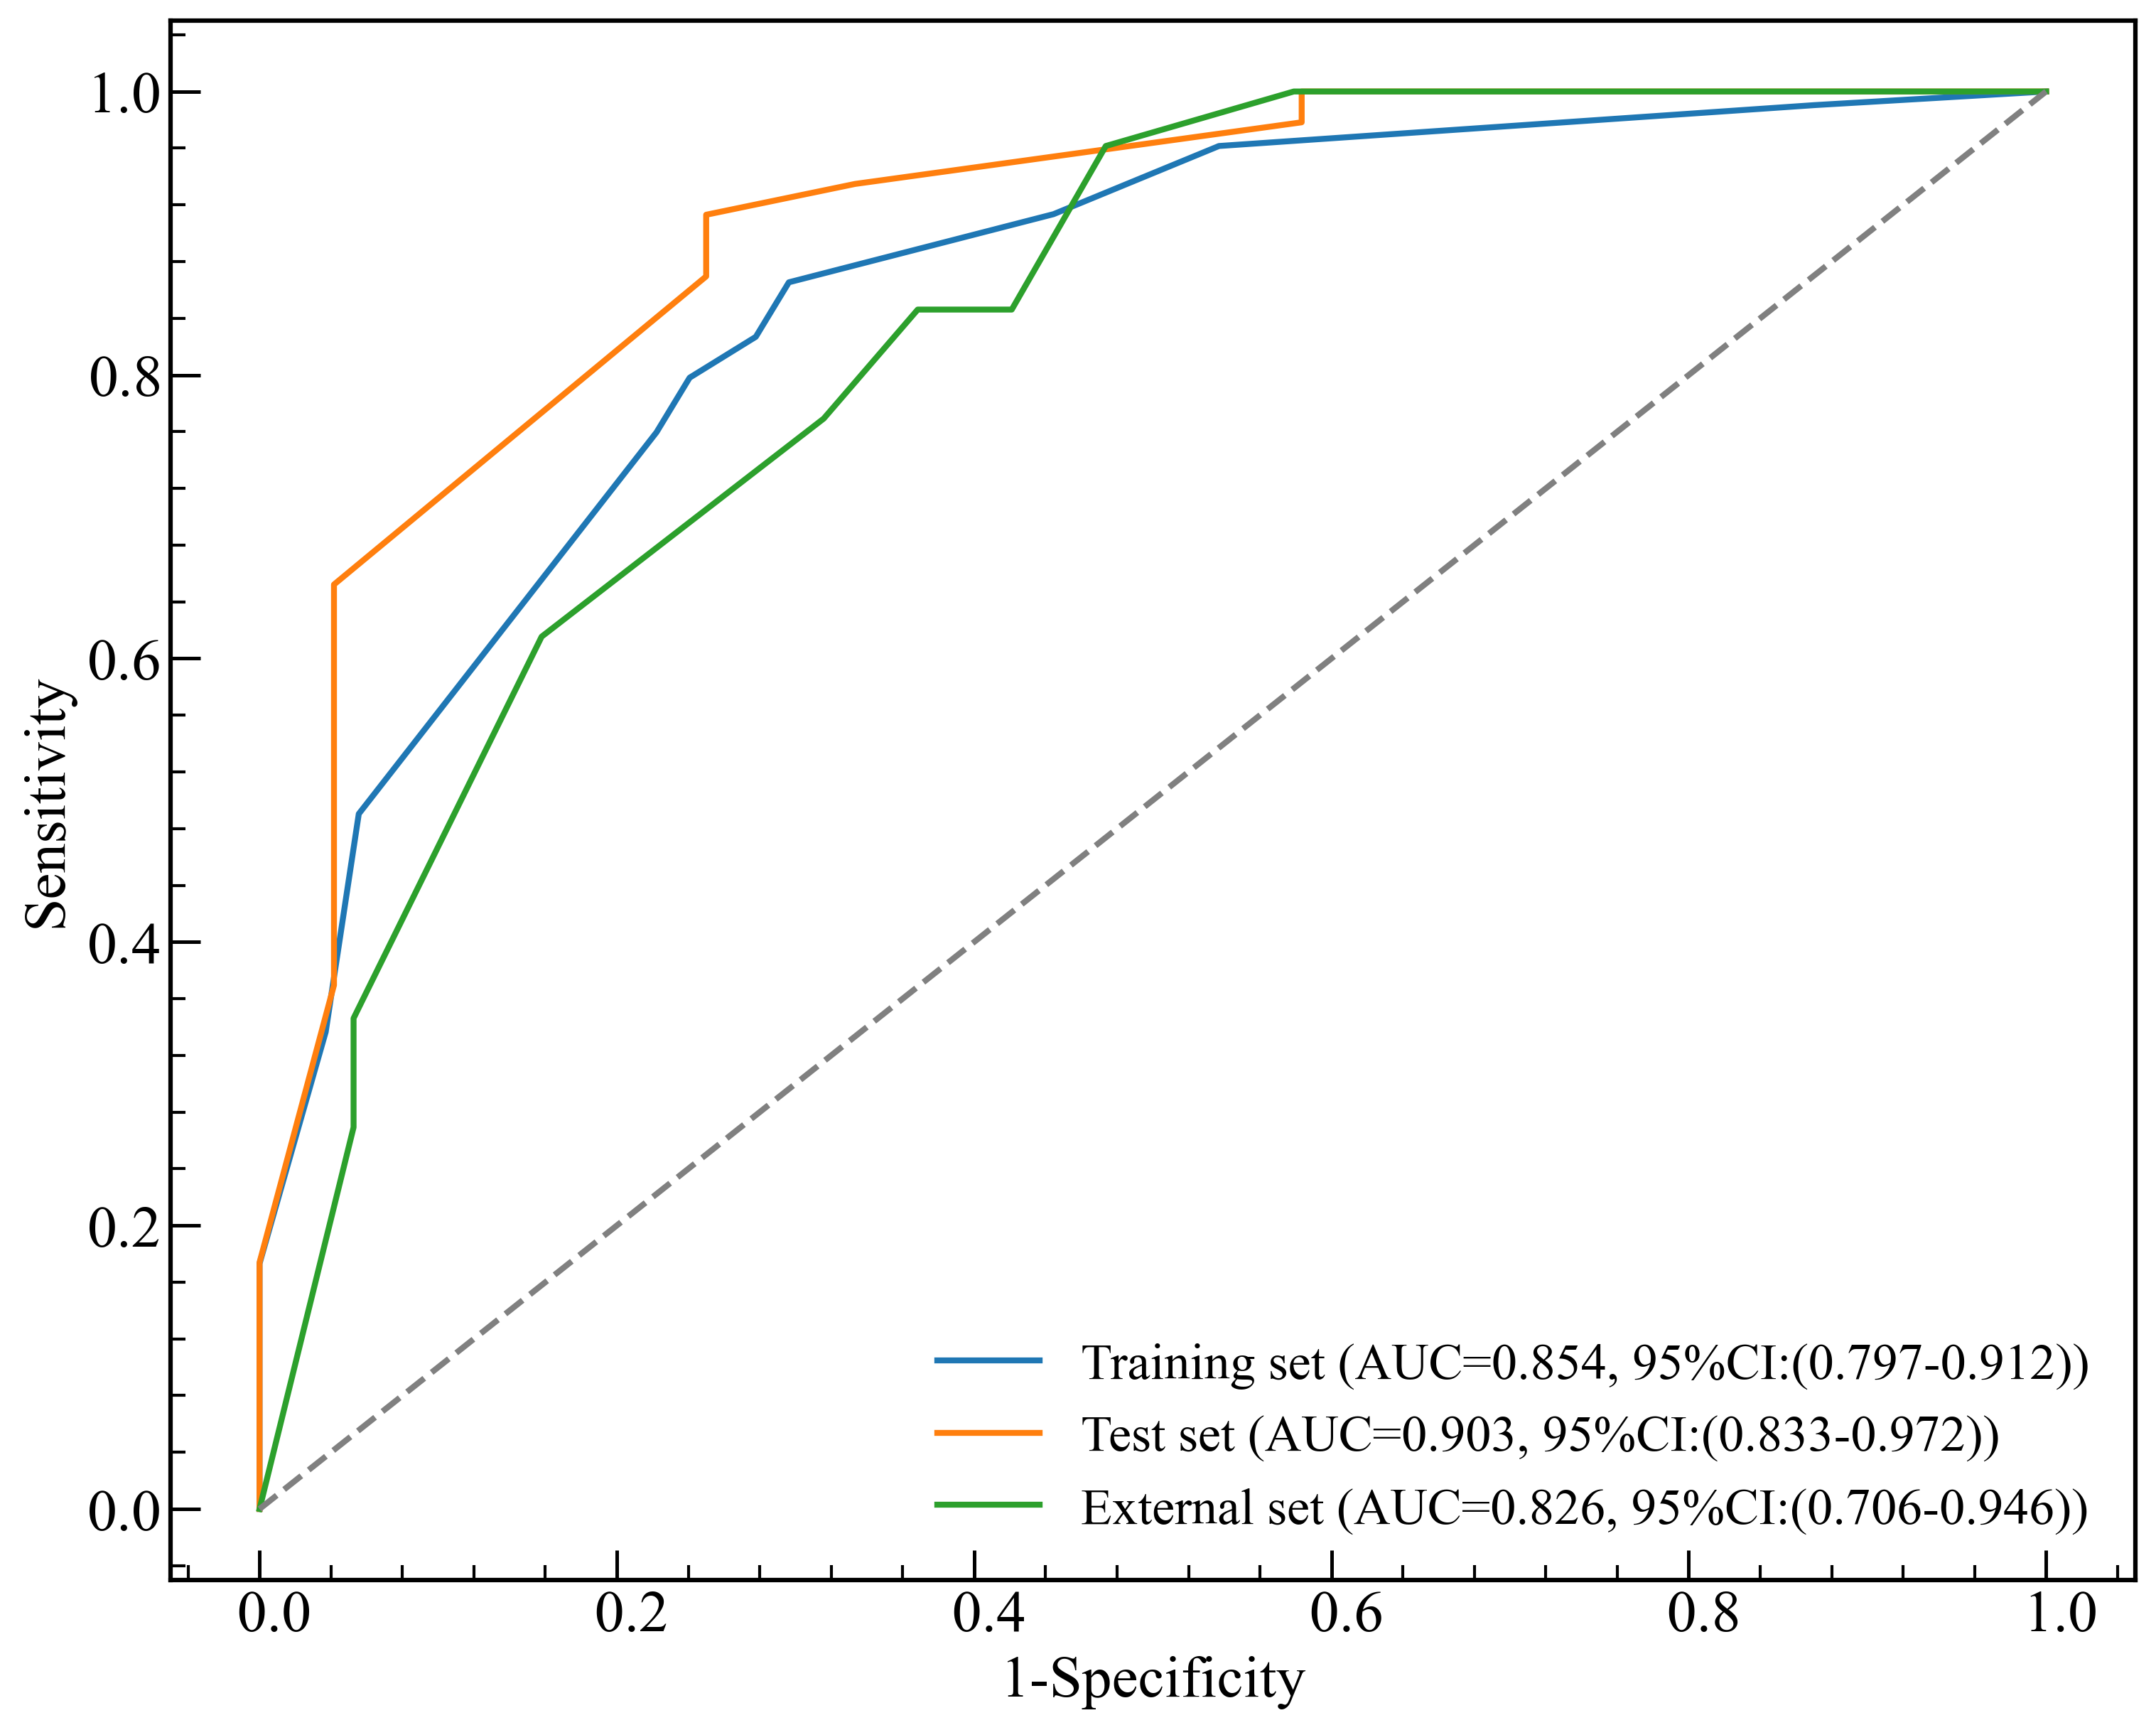

In [12]:
Roc_Auc_Plot(results_list, legends=['Training set', 'Test set', 'External set'], saved='./clincial_ROC.png')

In [13]:
print(extest_y_score)
print(np.array(extest_y_true))
print({x:y for x, y in zip(extest_y_score,np.array(extest_y_true))})

[0.45229177 0.12405616 0.15502584 0.89315872 0.96131583 0.12405616
 0.96131583 0.89315872 0.96131583 0.69015942 0.89315872 0.51685316
 0.89315872 0.89315872 0.96131583 0.15502584 0.75604923 0.75604923
 0.69015942 0.89315872 0.90208356 0.75604923 0.45229177 0.96131583
 0.45229177 0.89315872 0.75604923 0.75604923 0.96131583 0.15502584
 0.34705438 0.15502584 0.89315872 0.75604923 0.15502584 0.96131583
 0.34705438 0.90208356 0.34705438 0.75604923 0.15502584 0.89315872
 0.69015942 0.45229177 0.96131583]
[1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 0 0 1 1]
{0.452291774883668: 1, 0.124056157754715: 0, 0.155025840591122: 0, 0.89315872346836: 0, 0.961315830565411: 1, 0.690159416476732: 0, 0.51685315972792: 0, 0.756049232111634: 0, 0.902083555032737: 1, 0.347054382839017: 0}


In [14]:
classification_evaluation(extest_y_true, extest_y_pred, extest_y_score)

{'auc': 0.8259109311740891,
 'auc_CI': [0.7060503725150566, 0.9457714898331215],
 'sensitivity(recall)': 0.8461538461538461,
 'specificity': 0.631578947368421,
 'accuracy': 0.7555555555555555,
 'precision': 0.7586206896551724,
 'f1': 0.8}

In [15]:
classification_evaluation(train_y_true, train_y_pred, train_y_score)

{'auc': 0.8543447293447294,
 'auc_CI': [0.79708764555627, 0.9116018131331888],
 'sensitivity(recall)': 0.8269230769230769,
 'specificity': 0.7222222222222222,
 'accuracy': 0.7911392405063291,
 'precision': 0.8514851485148515,
 'f1': 0.8390243902439023}

In [16]:
classification_evaluation(test_y_true, test_y_pred, test_y_score)

{'auc': 0.9026268115942029,
 'auc_CI': [0.8328831976011144, 0.9723704255872914],
 'sensitivity(recall)': 0.9130434782608695,
 'specificity': 0.75,
 'accuracy': 0.8571428571428571,
 'precision': 0.875,
 'f1': 0.8936170212765957}

In [17]:
exr_df = pd.read_csv('../manuscript_back_modify_20230104/external_cliradio.csv')
exr_df = exr_df[['label','radiomics_score']]
exr_df.rename(columns={'radiomics_score':'y_score'}, inplace=True)
exr_df.head()

,label,y_score
0,1,0.730589
1,0,0.377057
2,0,0.649151
3,1,0.608155
4,1,0.615327


In [18]:
radio_y_score = np.array(exr_df['y_score'])
radio_y_true = exr_df['label']
radio_thre = ROC_threshold(test_y_true, test_y_score)[0]
print(radio_thre)

0.690159416476732


In [19]:
print(radio_thre)
radio_y_pred = radio_y_score > 0.6
radio_results = pd.DataFrame({'y_true':radio_y_true, 'y_pred':radio_y_pred, 'y_score':radio_y_score})

0.690159416476732


In [20]:
print(len(radio_y_pred))
classification_evaluation(radio_y_true, radio_y_pred, radio_y_score)

45


{'auc': 0.7469635627530364,
 'auc_CI': [0.60482752471476, 0.8890996007913129],
 'sensitivity(recall)': 0.6923076923076923,
 'specificity': 0.6842105263157895,
 'accuracy': 0.6888888888888889,
 'precision': 0.75,
 'f1': 0.7199999999999999}